In [5]:
import os, glob
import numpy as np
import pandas as pd
import sklearn
import time
import random 
import math
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn import svm
from scipy import stats 
from scipy.special import factorial
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 

In [6]:
path = "Data/"

all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv( "merged.csv")

In [7]:
data = pd.read_csv('merged.csv')
display(data.head(5))

,Unnamed: 0,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Div
0,0,2009-2010,Barcelona,Sp Gijon,3,0,H,2,0,H,...,5,10,12,9,7,0,2,0,0,NaN
1,1,2009-2010,Getafe,Barcelona,0,2,A,0,0,D,...,9,15,19,2,5,3,0,0,0,NaN
2,2,2009-2010,Barcelona,Ath Madrid,5,2,H,4,1,H,...,4,8,17,7,8,1,3,0,0,NaN
3,3,2009-2010,Santander,Barcelona,1,4,A,0,3,A,...,6,10,10,2,3,4,1,0,0,NaN
4,4,2009-2010,Malaga,Barcelona,0,2,A,0,1,A,...,6,16,17,3,1,3,3,1,0,NaN


In [8]:
data.describe()

,Unnamed: 0,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,226.000000,1.982340,1.512141,0.900662,0.640177,13.737307,11.236203,5.792494,4.626932,13.441501,12.388521,5.434879,4.295806,2.178808,2.397351,0.141280,0.101545
std,130.914094,1.773614,1.488290,1.060691,0.836592,5.832799,5.204603,3.432824,2.850226,4.998606,4.291281,3.112681,2.794734,1.564623,1.534613,0.379094,0.330356
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113.000000,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,10.000000,10.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,226.000000,2.000000,1.000000,1.000000,0.000000,13.000000,11.000000,5.000000,4.000000,13.000000,12.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,339.000000,3.000000,2.000000,1.000000,1.000000,18.000000,15.000000,8.000000,7.000000,17.000000,15.000000,7.000000,6.000000,3.000000,3.000000,0.000000,0.000000
max,452.000000,8.000000,8.000000,6.000000,5.000000,32.000000,29.000000,22.000000,14.000000,30.000000,29.000000,15.000000,14.000000,8.000000,9.000000,2.000000,2.000000


In [9]:
n_matches = data.shape[0] 
n_features = data.shape[1] - 1 

away = (data[data.AwayTeam == 'Barcelona'])
home = (data[data.HomeTeam == 'Barcelona'])

n_away = len(away[away.FTR == 'A'])
n_home = len(home[home.FTR == 'H'])
n_draw = len(data[data.FTR == 'D']) 

n_matches_home = home.shape[0] 
n_matches_away = away.shape[0] 

draw_rate = (float(n_draw) / (n_matches)) * 100 
win_rate_away = (float(n_away) / (n_matches_away)) * 100 
win_rate_home = (float(n_home) / (n_matches_home)) * 100

# Print the results
print("Below there is la liga statistics for football club Barcelona for the past 7 seasons:\n")
print("Total number of matches: {}".format(n_matches))
print("Number of features: {}".format(n_features))
print("Number of matches won as home team: {}".format(n_home))
print("Number of matches won as away team: {}".format(n_away))
print("Number of matches drawn: {}".format(n_draw))
print("Win rate as home team: {:.2f}%".format(win_rate_home))
print("Win rate as away team: {:.2f}%".format(win_rate_away))
print("Draw rate: {:.2f}%".format(draw_rate)) 

Below there is la liga statistics for football club Barcelona for the past 7 seasons:

Total number of matches: 453
Number of features: 22
Number of matches won as home team: 188
Number of matches won as away team: 147
Number of matches drawn: 75
Win rate as home team: 83.19%
Win rate as away team: 64.76%
Draw rate: 16.56%


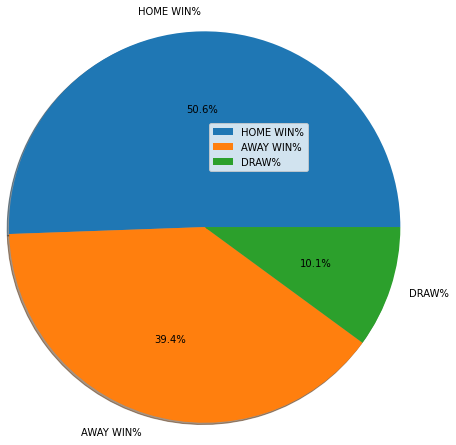

In [53]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([win_rate_home, win_rate_away, draw_rate])
mylabels = ["HOME WIN%", "AWAY WIN%", "DRAW%"]
#mycolors = ["#008080", "#3d3d3d", "#2e2e00"]

plt.pie(y, labels = mylabels, shadow = True, autopct='%1.1f%%', radius = 2.25)
plt.legend()
plt.show() 

In [6]:
# Separate into feature set and target variable 
X_all = data.drop(['FTR'],1)
y_all = data['FTR']

# Standardising the data. Center to the mean and component wise scale to unit variance.
cols = [['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [7]:
def preprocess_features(X): 
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (104 total features):

['Unnamed: 0', 'Season_2009-2010', 'Season_2010-2011', 'Season_2011-2012', 'Season_2013-2014', 'Season_2014-2015', 'Season_2015-2016', 'Season_2016-2017', 'Season_2017-2018', 'Season_2018-2019', 'Season_2019-20', 'Season_2020-21', 'HomeTeam_Alaves', 'HomeTeam_Almeria', 'HomeTeam_Ath Bilbao', 'HomeTeam_Ath Madrid', 'HomeTeam_Barcelona', 'HomeTeam_Betis', 'HomeTeam_Cadiz', 'HomeTeam_Celta', 'HomeTeam_Cordoba', 'HomeTeam_Eibar', 'HomeTeam_Elche', 'HomeTeam_Espanol', 'HomeTeam_Getafe', 'HomeTeam_Girona', 'HomeTeam_Granada', 'HomeTeam_Hercules', 'HomeTeam_Huesca', 'HomeTeam_La Coruna', 'HomeTeam_Las Palmas', 'HomeTeam_Leganes', 'HomeTeam_Levante', 'HomeTeam_Malaga', 'HomeTeam_Mallorca', 'HomeTeam_Osasuna', 'HomeTeam_Real Madrid', 'HomeTeam_Santander', 'HomeTeam_Sevilla', 'HomeTeam_Sociedad', 'HomeTeam_Sp Gijon', 'HomeTeam_Tenerife', 'HomeTeam_Valencia', 'HomeTeam_Valladolid', 'HomeTeam_Vallecano', 'HomeTeam_Villarreal', 'HomeTeam_Xerez', 'Hom

In [8]:
def AdaBoost_classifier(train_X,train_Y,test_X,test_Y):
    clf = AdaBoostClassifier(n_estimators=50)
    clf.fit(train_X,train_Y)
    trainAccuracy = clf.score(train_X,train_Y)
    pred = clf.predict(test_X)
    #print(pred)
    accuracy = metrics.accuracy_score(test_Y,pred)
    return accuracy,trainAccuracy

In [9]:
def RandomForest_classifier(train_X,train_Y,test_X,test_Y):
    
    clf=RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    clf.fit(train_X,train_Y)
    trainAccuracy = clf.score(train_X,train_Y)
    y_pred = clf.predict(test_X)
    #print(y_pred)
    accuracy = metrics.accuracy_score(test_Y,y_pred)
    return accuracy, trainAccuracy

In [10]:
def SVM_classifier(train_X,train_Y,test_X,test_Y):
    clf = svm.SVC()
    clf.fit(train_X, train_Y)
    trainAccuracy = clf.score(train_X,train_Y)
    y_pred = clf.predict(test_X)
    accuracy = metrics.accuracy_score(test_Y,y_pred)
    return accuracy,trainAccuracy

In [11]:
def KNN_classifier(train_X,train_Y,test_X,test_Y):
    
    clf = KNeighborsClassifier(n_neighbors=2)
    clf.fit(train_X, train_Y)
    trainAccuracy = clf.score(train_X,train_Y)
    y_pred = clf.predict(test_X)
    accuracy = metrics.accuracy_score(test_Y,y_pred)
    return accuracy,trainAccuracy

In [12]:
def NeuralNets_classifier(train_X,train_Y,test_X,test_Y):
    
    clf = MLPClassifier(hidden_layer_sizes=(10, 2), learning_rate_init=0.0001,max_iter=200)
    clf.fit(train_X, train_Y)
    trainAccuracy = clf.score(train_X,train_Y)
    y_pred = clf.predict(test_X)
    accuracy = metrics.accuracy_score(test_Y,y_pred)
    return accuracy,trainAccuracy
#overfitting, underfitting

In [13]:
def NaiveBayes_classifier(train_X,train_Y,test_X,test_Y):
    
    clf = GaussianNB()
    clf.fit(train_X, train_Y)
    trainAccuracy = clf.score(train_X,train_Y)
    y_pred = clf.predict(test_X)
    accuracy = metrics.accuracy_score(test_Y,y_pred)
    return accuracy,trainAccuracy

In [14]:
# Cross Validation at 80% and 20% 
train_X, test_X,train_Y, test_Y = train_test_split(X_all,y_all,test_size=0.3)

accuracy_SVM = []
accuracy_AdaBoost = []
accuracy_RandomForest = []
accuracy_KNN = []
accuracy_NN = []
accuracy_NB = []

train_SVM = []
train_AdaBoost = []
train_RandomForest = []
train_KNN = []
train_NN = []
train_NB = []

# AdaBoost Classifier
testAccuracy1, trainAccuracy1 = AdaBoost_classifier(train_X,train_Y,test_X,test_Y)
accuracy_AdaBoost.append(testAccuracy1)
train_AdaBoost.append(trainAccuracy1)

# RandomForest Classifier
testAccuracy2,trainAccuracy2 = RandomForest_classifier(train_X,train_Y,test_X,test_Y)
accuracy_RandomForest.append(testAccuracy2)
train_RandomForest.append(trainAccuracy2)
        
# K-Nearest-Neighbour Classifier
testAccuracy3,trainAccuracy3 = KNN_classifier(train_X,train_Y,test_X,test_Y)
accuracy_KNN.append(testAccuracy3)
train_KNN.append(trainAccuracy3)
        
# SVM classifier
testAccuracy4, trainAccuracy4 = SVM_classifier(train_X,train_Y,test_X,test_Y)
accuracy_SVM.append(testAccuracy4)
train_SVM.append(trainAccuracy4)
        
# Neural Nets classifier
testAccuracy5,trainAccuracy5 = NeuralNets_classifier(train_X,train_Y,test_X,test_Y)
accuracy_NN.append(testAccuracy5)
train_NN.append(trainAccuracy5)
        
# Naive Bayes classifier        
testAccuracy6,trainAccuracy6 = NaiveBayes_classifier(train_X,train_Y,test_X,test_Y)
accuracy_NB.append(testAccuracy6)
train_NB.append(trainAccuracy6) 

print('FOR TRAINING:\n')        
print("Accuracy for AdaBoost:",np.mean(train_AdaBoost))
print("Accuracy for RandomForest:",np.mean(train_RandomForest))
print("Accuracy for KNN:",np.mean(train_KNN))
print("Accuracy for svm:",np.mean(train_SVM))
print("Accuracy for Neural Nets:",np.mean(train_NN))
print("Accuracy for Naive Bayes:",np.mean(train_NB)) 


print('\nFOR TESTING:\n')
print("Accuracy for AdaBoost:",np.mean(accuracy_AdaBoost))
print("Accuracy for RandomForest:",np.mean(accuracy_RandomForest))
print("Accuracy for KNN:",np.mean(accuracy_KNN))
print("Accuracy for svm:",np.mean(accuracy_SVM))
print("Accuracy for Neural Nets:",np.mean(accuracy_NN))
print("Accuracy for Naive Bayes:",np.mean(accuracy_NB)) 

FOR TRAINING:

Accuracy for AdaBoost: 0.8296529968454258
Accuracy for RandomForest: 0.804416403785489
Accuracy for KNN: 0.8170347003154574
Accuracy for svm: 0.47318611987381703
Accuracy for Neural Nets: 0.1829652996845426
Accuracy for Naive Bayes: 0.61198738170347

FOR TESTING:

Accuracy for AdaBoost: 0.8382352941176471
Accuracy for RandomForest: 0.7647058823529411
Accuracy for KNN: 0.5220588235294118
Accuracy for svm: 0.5
Accuracy for Neural Nets: 0.18382352941176472
Accuracy for Naive Bayes: 0.49264705882352944


C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Prediction based on Poisson Distribution

In [15]:
# Poisson probability is: P(x; μ) = (e-μ) (μx) / x!
# lam =2.07 
# k is no. of event I want to find the probability of

def poisson(k,gd):
    minutes=90
    lam =(gd)
    p_k= np.exp(-lam)*np.power(lam,k)/factorial(k)
    print(f'The probability of {k} goal difference in {minutes} minutes is {100*p_k:.2f}%.')
    return p_k

In [16]:
#proability of goals acc to poisson distribution
k=[]
p_k=[]
for i in range(5):
    p_k.append(poisson(i,2.07)*100)
    k.append(i)

The probability of 0 goal difference in 90 minutes is 12.62%.
The probability of 1 goal difference in 90 minutes is 26.12%.
The probability of 2 goal difference in 90 minutes is 27.03%.
The probability of 3 goal difference in 90 minutes is 18.65%.
The probability of 4 goal difference in 90 minutes is 9.65%.


<Figure size 432x288 with 0 Axes>

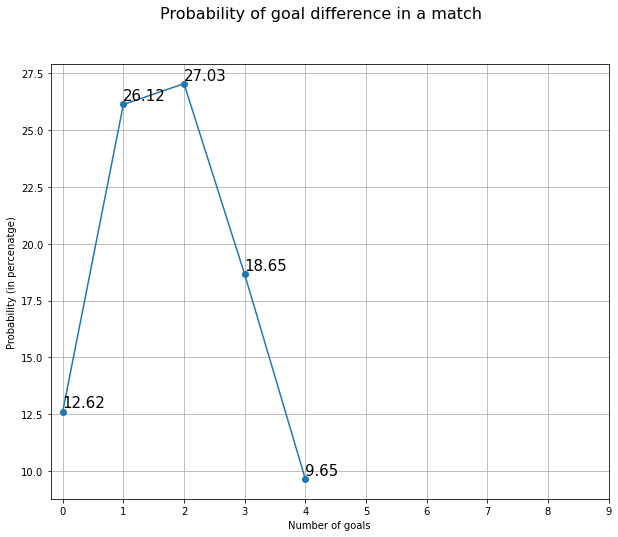

In [17]:
fig = plt.figure()
fig = plt.figure(figsize = (10,8))
plt.plot(k,p_k,'o-')
plt.xticks(range(10))
fig.suptitle('Probability of goal difference in a match',fontsize=16)
plt.xlabel('Number of goals')
plt.ylabel('Probability (in percenatge)')
for x,y in zip(k,p_k):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,4), # distance from text to points (x,y)
                 ha='left',fontsize=15)
plt.grid(True)

In [18]:
def PredictScoreHome():
    
    print("Home team is Barcelona")
    away = input("Enter Away Team: ")   
    
    home = (data[data.HomeTeam == 'Barcelona'])     
    avg_home_score = home.FTHG.mean() 
    avg_away_score = home.FTAG.mean() 
    avg_home_score = math.ceil(avg_home_score) 
    avg_away_score = math.ceil(avg_away_score)
    home_goal = int(stats.mode(np.random.poisson(avg_home_score,100000))[0]) 
    away_goal = int(stats.mode(np.random.poisson(avg_away_score,100000))[0])
    print(f'The scoreline is Barcelona {home_goal}:{away_goal} {away}')

In [19]:
def PredictScoreAway():
    
    print("Away team is Barcelona")
    home = input("Enter Home Team: ")   
    
    away = (data[data.AwayTeam == 'Barcelona'])     
    avg_home_score = away.FTHG.mean() 
    avg_away_score = away.FTAG.mean() 
    avg_home_score = math.ceil(avg_home_score) 
    avg_away_score = math.ceil(avg_away_score)
    home_goal = int(stats.mode(np.random.poisson(avg_home_score,100000))[0]) 
    away_goal = int(stats.mode(np.random.poisson(avg_away_score,100000))[0])
    print(f'The scoreline is {home} {home_goal}:{away_goal} Barcelona')

In [ ]:
PredictScoreHome()

Home team is Barcelona


In [ ]:
PredictScoreAway()